#Numpy Khaliq Aghakarimov

In [0]:
"restart this cell when you want to start from scratch"
%reset -f
import numpy as np

##What is it? Khaliq Aghakarimov

Python lists are extensible on demand and can contain anything. It creates with square brackets: `aList=[]`. In a scientific setting, for performance reasons, we essentially work with numpywho creates tensors, ie:

* multi-dimensional arrays
* fixed size
* which can only contain one type of object: intor float(numpy manages other types, but we will not use them)
* quickly manipulated as a whole set (thanks to "implicit loops")

The order or dimension of a tensor is its index number:

* tensor of order 1 = vector, eg to store sound
* tensor of order 2 = matrix, eg to store an image
* Tensor of order 3 = volume, eg to store a video
* 4th order tensor = very useful when doing deep-learning on images

We specify the display of numpy tables:

* 3 decimals after the decimal point
* we suppress the scientific notation of the numbers
* we just want outlines

In [0]:
np.set_printoptions(precision=3,suppress=True,linewidth=5000)

##Type of data Khaliq Aghakarimov

Here are the main dtypes (= data-type) that we encounter:

* np.float64= floating on 64 bits: it is the default dtype to store real values.
* np.int64= signed 64-bit integer: this is the default dtype for storing integer values.
* np.uint8= 8-bit unsigned integer: we get them when we import images `png` or `jpeg`. Pixels take values from 0 to 255
* np.float32, np.int32: The library `tensorflow` that allows you to do deeplearning is by default 32 bits.

### Floating table

In [0]:
"""a vector initialized by a list of values. """
vec=np.array([1.,2,3,4])
"""a matrix"""
mat=np.array([ [1.,2,0],[3,4,0]])
"note that we put at least one floating coefficient (with a point)"

print("vec\n",vec)
print("mat\n",mat)

vec
 [1. 2. 3. 4.]
mat
 [[1. 2. 0.]
 [3. 4. 0.]]


The main features of a table are:

* dtype = data-type
* shape = its shape

In [0]:
print("vec:",vec.dtype,vec.shape)
print("mat:",mat.dtype,mat.shape)

vec: float64 (4,)
mat: float64 (2, 3)


In [0]:
"""Floating vector initialized to 0, float matrix initialized to 1"""
vec_zero=np.zeros(shape=[5])
mat_one=np.ones(shape=[5,4])
print("\n vec_zero\n",vec_zero)
print("\n mat_one \n",mat_one)


 vec_zero
 [0. 0. 0. 0. 0.]

 mat_one 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Integer Table

Be careful, since python 3, array index must be integers necessarily. For example, `tensor[3.0]` returns an error.

So, if you want to make a table that contains several indexes, you have to create an array of integers. This is almost the only case where we will use such tables.

In [0]:
indexes=np.array([0,3,1])
vec = np.array([0.,2,4,6,8,10])
print(indexes)
print(indexes.dtype)
print(vec[indexes])

[0 3 1]
int64
[0. 6. 2.]


In [0]:
"""convert"""
vec=np.array([1.5,2.5,3.5,4.5])
print(vec," dtype:",vec.dtype)
vec=vec.astype(np.int64)
print(vec," dtype:",vec.dtype)
vec=vec.astype(np.float64)
print(vec," dtype:",vec.dtype)

[1.5 2.5 3.5 4.5]  dtype: float64
[1 2 3 4]  dtype: int64
[1. 2. 3. 4.]  dtype: float64


**TODO:** modify ($1\heartsuit$) the vector indexes above, so that it contains floats. Indicate the resulting error message.

## Element by Element Operations  Khaliq Aghakarimov

Most tensor operations are element-by-element using a very fast implicit mimic. For example, `tensor1 * tensor2` performs the term-to-term multiplication (and not a matrix multiplication).

###Examples

In [0]:
"""all these operations on the tensors are done term by term."""

vec = np.array([1., 2, 3, 4])
vec_square = vec**2
vec2= vec+vec_square
vec3=7*vec
vec4=np.sin(vec)
vec5=vec2*vec3


print("vec",vec)
print("vec_square",vec_square)
print("vec2",vec2)
print("vec3",vec3)
print("vec4",vec4)
print("vec5",vec5)

vec [1. 2. 3. 4.]
vec_square [ 1.  4.  9. 16.]
vec2 [ 2.  6. 12. 20.]
vec3 [ 7. 14. 21. 28.]
vec4 [ 0.841  0.909  0.141 -0.757]
vec5 [ 14.  84. 252. 560.]


Here is a very classic example of using a numpy function

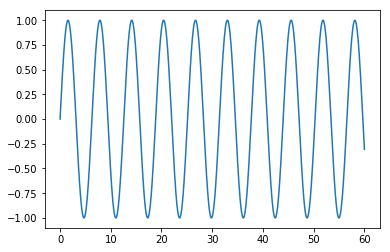

In [0]:
import matplotlib.pyplot as plt
x=np.linspace(0,60,1000)
y=np.sin(x)
plt.plot(x,y);

###Performance

Let's compare the performance between an implicit and an explicit loop

In [0]:
a=np.random.randint(0,100,size=1000000)
b=np.random.randint(0,100,size=1000000)

In [0]:
%%time
"""
%% time: To calculate the time of an entire cell
% time: To calculate the time of a line of code
"""
"implicit loop"
c=a*b
print("first values:\n",c[:10])

first values:
 [1551 3895 3441 3149 7920  237 6674  918  966 1584]
CPU times: user 4.32 ms, sys: 8.65 ms, total: 13 ms
Wall time: 15.8 ms


In [0]:
%%time
c=np.empty(len(a))
"explicit loop"
for i in range(len(a)):
  c[i]=a[i]*b[i]
print("first values:",c[:10])

first values: [1551. 3895. 3441. 3149. 7920.  237. 6674.  918.  966. 1584.]
CPU times: user 438 ms, sys: 5.32 ms, total: 444 ms
Wall time: 444 ms


###numpy makes copies

Most numpy functions do not change the starting argument: a 'copy' is made.

In [0]:
vec = np.array([1., 2, 3, 4])
vec1=vec**2
vec2=np.sin(vec)

print(vec.round())
print(vec1)
print(vec2)

"""vec did not change"""
print("vec",vec)

[1. 2. 3. 4.]
[ 1.  4.  9. 16.]
[ 0.841  0.909  0.141 -0.757]
vec [1. 2. 3. 4.]


A normal exception:

In [0]:
"here the memory space of` vec` is reused to store `2 * vec`" 
vec*=2
print(vec)

[2. 4. 6. 8.]


### Object or functional syntax

Many numpy functions can be used with two different syntaxes:

1. `np.fonction(tensor)`
2. `tensor.fonction()`

And even in the second case, a copy of the tensor is made; it's a bit misleading because the object syntax `tensor.fonction()` usually suggests an operation that modifies the object itself ("inPlace" operation)

In [0]:
vec = np.array([1.1234, 2.1234, 3.1234, 4.1234])

"""round"""
vec1= np.round(vec,1)
"""idem with different syntax"""
vec2= vec.round(1)

print("vec1", vec1)
print("vec2", vec2)


"""vec did not change (however it only appears with 3 decimals because of our header)"""
print("vec", vec)

vec1 [1.1 2.1 3.1 4.1]
vec2 [1.1 2.1 3.1 4.1]
vec [1.123 2.123 3.123 4.123]


**EX:**

Remember to use auto completion to see what features are available. For example, type `np.a` followed by the tab key. Use this to plot functions

* arccosinus  ($1 \heartsuit$)  
* arctangeante ($1 \heartsuit$)  
* the integer upper or lower part ( np."ceiling" or np."floor" in English), or the rounding (round)  ($1 \heartsuit$)  
* hyperbolic cosine ($1 \heartsuit$)  
* natural logarithm ($1 \heartsuit$)  
* logarithm base 10 ($1 \heartsuit$)  

Also remember a special function: `np.arctan2(x,y)` which returns the alpha angle of the coordinate point (x, y)

# Axes game Khaliq Aghakarimov

For tensors of dimension ≥2, operations can be performed following a given axis. Let's start by observing this on matrices (dim=2).

### Lines and Columns Khaliq Aghakarimov

The convention for numbering rows and columns is the same as in mathematics.

In [0]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print(mat)

[[ 1  2  3]
 [-1 -2 -3]]


In [0]:
"labels are added to clarify. The pandas library is used for this purpose."
import pandas as pd
df=pd.DataFrame(mat,index=["i=0","i=1"],columns=["j=0","j=1","j=2"])
df

,j=0,j=1,j=2
i=0,1,2,3
i=1,-1,-2,-3


In [0]:
print("sum_ij mat[i,j]:\n",np.sum(mat))
print("sum_i mat[i,j]:\n",np.sum(mat,axis=0))
print("sum_j mat[i,j]:\n",np.sum(mat,axis=1))

sum_ij mat[i,j]:
 0
sum_i mat[i,j]:
 [0 0 0]
sum_j mat[i,j]:
 [ 6 -6]


In [0]:
v1=np.array([10,20,30])
v2=np.array([100,200,300])
print("append all along with i:\n",np.stack([v1,v2],axis=0))
print("append all along with j:\n",np.stack([v1,v2],axis=1)) 

append all along with i:
 [[ 10  20  30]
 [100 200 300]]
append all along with j:
 [[ 10 100]
 [ 20 200]
 [ 30 300]]


In [0]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print("mat:\n",mat)
mat2=np.array([[10,20],[30,40]])
print("mat2:\n",mat2)
print("concatenate:\n",np.concatenate([mat,mat2],axis=1))

mat:
 [[ 1  2  3]
 [-1 -2 -3]]
mat2:
 [[10 20]
 [30 40]]
concatenate:
 [[ 1  2  3 10 20]
 [-1 -2 -3 30 40]]


In the previous example, we could not have concatenated with `axis=0`. We would have had the error message: all the input array dimensions except for the concatenation axis must match exactly. 

In [0]:
print("max_j mat[i,j]:\n",np.max(mat,axis=1)) 
print("argmax_j mat[i,j]:\n",np.argmax(mat,axis=1))

max_j mat[i,j]:
 [ 3 -1]
argmax_j mat[i,j]:
 [2 0]


Be careful, when you don't specify the axes, the default operation is not always very clear: it is sometimes `axis=0` or it is sometimes "along all axes" like `np.sum`.

### Reshape $\flat$ Khaliq Aghakarimov

In [0]:
a=np.arange(0,12,1)
print("a:\n",a)
print("a.reshape([2,6]):\n",a.reshape([2,6]))
"The -1 means: 'fits the dimension' "
print("a.reshape([2,-1)]):\n",a.reshape([2,-1]))
print("a.reshape([2,2,3]):\n",a.reshape([2,2,3]))

a:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
a.reshape([2,6]):
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
a.reshape([2,-1)]):
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
a.reshape([2,2,3]):
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [0]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print("mat:\n",mat)
print("mat:\n",mat.reshape([-1]))

mat:
 [[ 1  2  3]
 [-1 -2 -3]]
mat:
 [ 1  2  3 -1 -2 -3]


### Broadcasting $\flat$ Khaliq Aghakarimov

Broadcasting is the act of making operations between tensors of different shapes. It is an operation that we do naturally in math, for example when we write:

$$
\sum_j  mat[i,j] \, vec[j]
$$


In [0]:
v=np.array([1,10])
"let's transform `v` into a column matrix, let's look at it next to the `mat matrix`  "
vv=v.reshape([2,1])
"or"
#vv=v[:,np.newaxis]
print(vv)
print(mat)

[[ 1]
 [10]]
[[ 1  2  3]
 [-1 -2 -3]]


In [0]:
" we multiply them: "
print(vv*mat)

[[  1   2   3]
 [-10 -20 -30]]


Thus the matrix `vv` was repeated three times in column before multiplying them item by item. This is even more natural if you use the syntax with newaxis (which does the same as the previous reshape).

In [0]:
"compute : v[i]*mat[i,j]"
print(v[:,np.newaxis]*mat)

[[  1   2   3]
 [-10 -20 -30]]


**TODO:** Using broadcasting, calculate $(2\heartsuit)$ the matrix product w . mat with `w = np.array([0,10])`.

Even if you don't like broadcasting, when you get code from the Internet, you can find it: and sometimes it's hidden!

In [0]:
"elementary case: addition of a scalar to a matrix: the scalar is repeated"
mat=np.array([[1,2,3],[-1,-2,-3]])
print("mat:\n",mat)
print("mat+3:\n",mat+3)

mat:
 [[ 1  2  3]
 [-1 -2 -3]]
mat+3:
 [[4 5 6]
 [2 1 0]]


In [0]:
vec=np.array([0,10,-10])
print("vec:\n",vec)
print("mat+vec:\n",mat+vec)

vec:
 [  0  10 -10]
mat+vec:
 [[  1  12  -7]
 [ -1   8 -13]]


***TODO:*** $(1\heartsuit)$ What is the default extension?  Change `with=np.array([0,10,-10])` to `with=np.array([0,10])`, read the error message. 

## Edit a tensor Khaliq Aghakarimov

### Directly

In [0]:
vec = np.array([1., 2, 3, 4])
mat = np.array([[1., 2], [3, 4]])

"""modify an element"""
vec[0] = 10.  # the numbering starts at zero
mat[1, 1] = 10.

""" attention, we have modified the initial objects"""
print("vec and mat after modification")
print(vec)
print(mat)

vec and mat after modification
[10.  2.  3.  4.]
[[ 1.  2.]
 [ 3. 10.]]


In [0]:
"""modify a bloc of elements"""
vec_zero = np.zeros(shape=[5])
vec_zero[0:3]=5 # [0:3] indicates the indices in the interval [0,3[

mat_un = np.ones(shape=[5, 4])
mat_un[0:2,0:3]=7

print("\nvec_zero\n", vec_zero)
print("\nmat_un\n", mat_un)


vec_zero
 [5. 5. 5. 0. 0.]

mat_un
 [[7. 7. 7. 1.]
 [7. 7. 7. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Via a 'view' on the data $\sharp$

Be careful, we are dealing here with one of the great difficulties of `numpy`; a difficulty that is found everywhere in computer science: the passage of data by copy or by reference.  

In [0]:
mat_un = np.ones(shape=[5, 4])

part=mat_un[0:2, 0:3]
"""all parts are set to 7"""
part[:,:]=7

"""Now observe, it's both logical and surprising:"""
print("\n mat_un\n", mat_un)
print("\n part\n", part)


 mat_un
 [[7. 7. 7. 1.]
 [7. 7. 7. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

 part
 [[7. 7. 7.]
 [7. 7. 7.]]


How it works: When you do

        mat_un = np.ones(shape=[5, 4])
        
the computer creates a table in its memory. `mat_un` is a view (=a reference) on the entire table.  Then when we do:
        
        part=mat_un[0:2, 0:3]
        
 the `part` variable is a view on a part of this array. By performing:
        
        part[:,,:]=7
        
we modify one of the table. 

On the other hand, when you do:
        
        a=mat_un[0,0]
        
the variable `a` contains a copy of the coefficient `mat_un[0,0]`. Modifying `a` does not modify the table in memory. The proof:

In [0]:
mat_un = np.ones(shape=[5, 4])
a=mat_un[0,0]
a=7
print('a=',a)
print("\n mat_un\n", mat_un)

a= 7

 mat_un
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Exercise 

What are the tensors a,b,c,.. here below $(4\diamondsuit)$?
Put the answer on paper, before checking with a `print()`. 
Try to distinguish the line matrix `[[1,2,3]]` of the vector `[1,2,3]`, the scalar `3` from the vector `[3]` etc.

In [0]:
"""fill the matrix with double loop"""
nbLine = 3
nbColumn = 4
mat = np.empty([nbLine, nbColumn],dtype=np.int64)
for i in range(nbLine):
    for j in range(nbColumn):
        mat[i, j] = i + j

print("\nmat \n",mat)

a = mat[0, :]
aBis = mat[0:1, :]
b = mat[:,0]
c = mat[:, nbColonne - 1]
d = mat[:,  - 1]  # this: is the same as the previous line
e = mat[-1,-1]
f = mat[0:2,:]
g = mat[0:2, 0:1]

##Selection by values Khaliq Aghakarimov

### Via the Boolean Tables

In [0]:
a=np.array([0.,1.,2,3,4,-1])
print(a)
print(a<0)
print(a>=0)
print(a[a<0])
print(a[a>=0])
print(a[a==0])

[ 0.  1.  2.  3.  4. -1.]
[False False False False False  True]
[ True  True  True  True  True False]
[-1.]
[0. 1. 2. 3. 4.]
[0.]


Be careful, the** `and`** and the **`or`** in the indices are not the same as the classical **`and`** and **`or`**.

In [0]:
print(a[(a>0)&(a<4)])
print(a[(a>0)|(a<4)])

[1. 2. 3.]
[ 0.  1.  2.  3.  4. -1.]


Unlike index selection (e. g.: `a[:,2]`), value selection creates a "copy", thus preserving the original.

In [0]:
a=np.array([0.,1.,2,3,4,-1])
b = a[a >= 0]
b[:] = 10
print('b',b)
""" 'a'  didn't change, ouf. """
print('a',a)

b [10. 10. 10. 10. 10.]
a [ 0.  1.  2.  3.  4. -1.]


***Important:*** When there is any doubt about `copy` or `reference`, we test, as above.

### Via conditions

To select elements in a table according to a complex criterion,
you have to make a loop, and use a list because you never know how many items you will select in advance. 

In [0]:
nbSimu=1000
a=np.random.randint(0,100,nbSimu)
res=[]
for i in range(nbSimu):
    if a[i]%3==0 and a[i]%7==0: 
      res.append(a[i])
"""at the end, we return the result in array numpy"""
res=np.array(res)
print(res)

[42 42  0 84 84 63  0 84 21  0 63 84 42 42 42 84 21  0  0 42 84 42 63 21 21 84 84 21  0 42 63 84 63  0 84 63 84 84 42 21  0 21 84]


# Linear Algebra  Khaliq Aghakarimov

Be careful, in numpy, vectors, line matrices and column matrices are different objects:

*   vector.shape = (?)
*   matrix_line.shape =(1,?)
*   column_column.shape =(?,1)
*   matrix_some.shape = (?,?)

Observe the console outputs: the vectors are written with 1 hook, the matrices with 2 hooks.



##Matrix multiplication Khaliq Aghakarimov

`np.matmul()` only applies between matrices. 

In [0]:
size=3
mat_col=np.ones(shape=[size,1])
mat_lin=np.ones(shape=[1,size])
mat_square=np.ones(shape=[size,size])

print("mat_col\n",mat_col)
print("mat_lin\n",mat_lin)
print("mat_square\n",mat_square)

print("mat_square .  mat_col\n",np.matmul(mat_square,mat_col) )
print("mat_lin . mat_square\n",np.matmul(mat_lin,mat_square))
print("mat_lin . mat_square . mat_col\n", np.matmul(np.matmul(mat_lin,mat_square),mat_col))


mat_col
 [[1.]
 [1.]
 [1.]]
mat_lin
 [[1. 1. 1.]]
mat_square
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
mat_square .  mat_col
 [[3.]
 [3.]
 [3.]]
mat_lin . mat_square
 [[3. 3. 3.]]
mat_lin . mat_square . mat_col
 [[9.]]


otherwise we can use `np.dot()` which allows multiplications matrix $\times$ vector, matrix $\times$ matrix, vector $\times$ vector (= scalar product)

In [0]:
size=3
vec0=np.ones(shape=[size])
vec1=2*np.ones(shape=[size])
mat_square=np.ones(shape=[size,size])

print("vec0 . vec1\n",np.dot(vec0,vec1))
print("vec0 . mat_square\n",np.dot(vec0,mat_square))
print("mat_square . vec0\n",np.dot(mat_square,vec0))
print("mat_square . mat_square\n",np.dot(mat_square,mat_square))

vec0 . vec1
 6.0
vec0 . mat_square
 [3. 3. 3.]
mat_square . vec0
 [3. 3. 3.]
mat_square . mat_square
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


and if you have python 3.5+, you can use the @ operator that makes the codes more readable

In [0]:
print("vec0 @ vec1\n",vec0 @ vec1)
print("vec0 @ mat_square\n",vec0 @ mat_square)
print("mat_square @ vec0\n",mat_square @ vec0)
print("mat_square @ mat_square\n",mat_square @  mat_square)

vec0 @ vec1
 6.0
vec0 @ mat_square
 [3. 3. 3.]
mat_square @ vec0
 [3. 3. 3.]
mat_square @ mat_square
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


**Exercise:** Multiply $(2\heartsuit)$ matrix matrices of non-compatible size.
Extract the interesting part of the error message.

### Inverse and transpose 

Note that the pseudo-inverse is used to invert non-invertible matrices (test). 

In [0]:
size=3
mat=np.zeros(shape=[size,size])
for i in range(size):
    mat[i,i]=1
mat[0,size-1]=2


print("mat\n",mat )
print("mat^T\n",mat.T)
print("mat^(-1)\n",np.linalg.inv(mat))
print("mat^(-1)-pseudo-inverse\n",np.linalg.pinv(mat))

mat
 [[1. 0. 2.]
 [0. 1. 0.]
 [0. 0. 1.]]
mat^T
 [[1. 0. 0.]
 [0. 1. 0.]
 [2. 0. 1.]]
mat^(-1)
 [[ 1.  0. -2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
mat^(-1)-pseudo-inverse
 [[ 1.  0. -2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### Eigen vector and eigen value

In french we say to `eigen`= propre, example: vecteur propre or valeur propore. 

In [0]:
size=4
"""a random matrix to which a normalization operation is applied (which one?)"""
mat=np.random.uniform(low=0,high=10,size=[size,size])
rowSum=np.sum(mat,axis=1)
""" mat[i,j]=mat[i,j]/rowSum(i)  """
for i in range(size): mat[i,:]/=rowSum[i]

eigVal,eigVec=np.linalg.eig(mat)
print("\nmat\n", mat )
print("\neigVal\n",np.real(eigVal))
print("\neigVec\n", np.real(eigVec))


mat
 [[0.08937216 0.40065358 0.16040132 0.34957294]
 [0.51162361 0.30778622 0.08327913 0.09731104]
 [0.02249671 0.36834367 0.35910584 0.25005378]
 [0.13837975 0.38110754 0.19251872 0.28799398]]

eigVal
 [ 1.         -0.14769588  0.19626416 -0.00431008]

eigVec
 [[ 0.5         0.52274102  0.06341769  0.26672148]
 [ 0.5        -0.71606596  0.44617827 -0.69916202]
 [ 0.5         0.34541381 -0.88871479  0.27758927]
 [ 0.5         0.30770223 -0.08419718  0.60247516]]


**TODO:** 

* For the previous `material`: why is 1 eigenvalue $(2\heartsuit)$? What is the associated eigenvector $(1\heartsuit)$? 

* `np.linalg.eig` does it give the right or left specific eigen vectors $(1\heartsuit)$? Are they arranged in a row or in a column $(1\heartsuit)$?

* In general, are all matrices diagonalisable $(1\heartsuit)$?  What are `np.real()` used for in the previous program $(1\heartsuit)$?  

* which of these two formulas is the right one $(1\heartsuit)$?

        Diag = P^-1 @ mat @ P   
or

        Diag = P @ mat @ P^-1
Check with python. Help: To transform a vector into a diagonal matrix, use `np.diag(vector)`

Warning, when starting from a symmetrical (or hermitian) matrix, to obtain diagonalization in an othornormal base, use `np.linalg.eigh` (h-like hermitian). Check it out $(2\heartsuit)$!

## Application: strong law of large numbers Khaliq Aghakarimov

###Graphic illustration

***Theorem:*** Let $(X_n)$ be a series of random vectors, which admits an expected value, we have: 
$$
\lim_n \frac 1 n (X_0+....+X_{n-1}) = \mathbf E[X_0]
$$

Note: to illustrate this theorem, we will draw the curve 
$$
   n \to \frac 1 n (X_0+....+X_{n-1})
$$
but you don't have to evaluate it for all $n$ (ex: you can go in steps of 40)

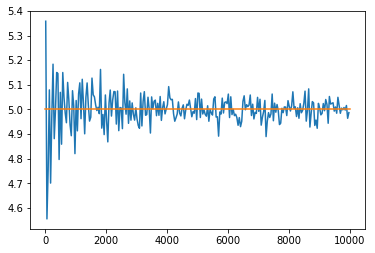

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

""" np.arange is like range() except that it gives a numpy array"""
n_max=10000
ns=np.arange(10,n_max,40)
means=[]
for n in ns:
    simus=np.random.uniform(0,10,size=n)
    means.append(np.mean(simus))

fig,ax=plt.subplots()
ax.plot(ns,means)
ax.plot([0,n_max],[5,5]);

***TODO:***$(3\heartsuit)$ I conscientiously made a mistake in the previous program, a mistake that many students make every year. Read carefully the law of large numbers, compare this statement with the program above. Find the bug.

### Digital illustration

In [0]:
nbSimu = 10000
"""a sample of random values on uniform law [0,1]"""
X1 = np.random.uniform(size=nbSimu)
"""a sample of random values of normal law (=gaussienne), centered and reduced by default."""
X2 = np.random.normal(size=nbSimu)
"""a sample of random values of Poisson law"""
X3 = np.random.poisson(1, size=nbSimu)

print(len(X1[X1<0.7])/nbSimu,"valeur attendue:",0.7)
print(sum( (X1-0.5)**2)/nbSimu,"valeur attendue:",1/12)
print(len(X2[X2<0.])/nbSimu,"valeur attendue:",0.5)

0.699 valeur attendue: 0.7
0.08332909480604295 valeur attendue: 0.08333333333333333
0.5104 valeur attendue: 0.5


Give the expected values above, and revise your Poisson's Law $(3\times 1\heartsuit)$.

In [0]:
print(np.sum(X2**2)/nbSimu,"valeur attendue:")
print(len(X3[X3==3])/nbSimu,"valeur attendue:")
print(len(X3[X3!=0])/nbSimu,"valeur attendue:")

0.9743604120979493 valeur attendue:
0.0615 valeur attendue:
0.6352 valeur attendue:


### Monte carlo


***TODO:*** using uniform variables, using the strong law of large numbers, estimate $(3\times 2\heartsuit)$ the following integrals:
$$
 \int_0^1 x \ dx \qquad \text{et} \qquad \int_0^{\frac 12 } \frac x {\ln(x)}dx \qquad \text{et} \qquad \int_0^1 \frac 1 x\ dx
$$   
This method for calculating integrals is called: Monte Carlo method

## Application: mean and standard deviation Khaliq Aghakarimov

Let's simulate samples:

In [0]:
nbData=100
X1=np.random.random(size=nbData)
X2=np.random.normal(size=nbData);

* let's calculate their average, which can be called: `mu_hat` (`mu` for expected value, and `hat` for estimation)
* let's calculate their empirical standard deviation: `sigma_hat`

In [0]:
print("uniform law sur [0,1]")
print("* mu_hat",X1.mean())
print("* sigma_hat",X1.std())

print("normal law")
print("* mu_hat", X2.mean())
print("* sigma_hat", X2.std())

uniform law sur [0,1]
* mu_hat 0.5428086739042128
* sigma_hat 0.27268063466366077
normal law
* mu_hat -0.0066754317914961645
* sigma_hat 0.9049306749416418


Using the estimators, experimentally check the following results $(4\times 2\heartsuit)$:

* the expectation of the sum of two random variables is the sum of the expectations.
* the variance of the sum of two independent random variables is...
* Suppose $X$ a random value, $a$ and $b$ constants. We have: $\mathbf V[aX+b]= ...$. 
* The expected of the square of a random value is always more... than the square of expected. 

## Numpy or not numpy Khaliq Aghakarimov

When writing a program, always ask yourself if you will use `numpy` tensors or not. For example, consider the following function:

In [0]:
def f(x):
    return x**2*(1-x)**2+1   

This function works (!) for `x` scalar, but also for `x` tensor: because the power operations `**`, sum `+` and product `*` are well defined on the tensors. Thus the graph can be plotted in two different ways:

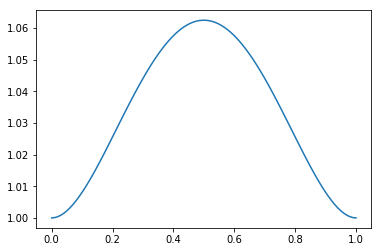

In [0]:
"""first method"""
xs=np.linspace(0,1,100)
ys=[]
for x in xs:
    ys.append(f(x))
plt.plot(xs,ys);

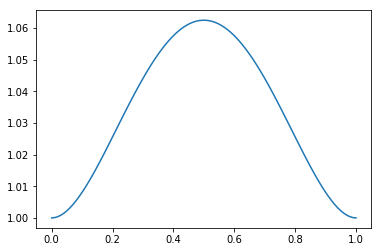

In [0]:
"""second method"""
plt.plot(xs,f(xs));

The second method is more elegant but also much faster.

However, let us consider the function:

In [0]:
def g(x):
    if 0<x<0.5: return x
    elif 0.5<x<2: return 2*x
    else : return 0

This `g` function does not work when `x` is a numpy tensor (try $(1\heartsuit)$, observe the error message, you will probably encounter it later). We can transform this function so that it works with `numpy` but it's a bit technical. 

The advice: first of all, don't get too upset. Do it as simply as possible, even if it is not the most efficient. You will learn the tricks as you go along. 

## Under the hood numpy $\flat$ Khaliq Aghakarimov

#### Flat data. 

No matter the `shape` or `data_type` (=data_type): in the memory, `numpy` arrays are stored as a 1D array, in 8-bit packets. When you change the `shape`, the data does not change at all, it is only the way you browse it that changes. 

In [0]:
"these 4 objects are associated with the same flat data."
vec=np.arange(0,9,1)
print("vec\n",vec)
mat_square=vec.reshape([3,3])
print("mat_square\n",mat_square)
mat_col=mat_square.reshape([9,1])
print("mat_col\n",mat_col)
mat_line=mat_square.reshape([1,9])
print("mat_line\n",mat_line)

vec
 [0 1 2 3 4 5 6 7 8]
mat_square
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
mat_col
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
mat_line
 [[0 1 2 3 4 5 6 7 8]]


### the attribute  `strides`

When you change the `shape`, you also change the attribute `strides`: it indicates how you move from one square to another.

### ex: vector 

For vectors, `strides` is a size 1 like scalar: it indicates how many 8-bit packets to slide from `vec[i]` to `vec[i+1]`. This depends only on the `dtype`.

In [0]:
a=np.zeros(shape=5,dtype=np.uint8)
print("np.uint8, strides:",a.strides)
a=np.zeros(shape=5,dtype=np.int32)
print("np.int32, strides:",a.strides)
a = np.zeros(shape=5, dtype=np.int64)
print("np.int64, strides:",a.strides)

np.uint8, strides: (1,)
np.int32, strides: (4,)
np.int64, strides: (8,)


### ex: matrix

In the case of matrices, `strides` is a pair. 

* `strides[0]` indicates how many 8-bit packets to slide from the `mat[i,j]` box to the `mat[i+1,j]` box 
* `strides[1]` indicates how many 8-bit packets to slide from the ``mat[i,j]`` box to the ``mat[i,j+1]`` box

Let's illustrate this with only `dtype=np.uint8`. 

In [0]:
a = np.zeros(shape=(2,4), dtype=np.uint8)
print("shape=(2,4), strides:", a.strides)

a = np.zeros(shape=(30, 5), dtype=np.uint8)
print("shape=(30,4), strides:", a.strides)

shape=(2,4), strides: (4, 1)
shape=(30,4), strides: (5, 1)


***TODO:*** Try to answer these 3 questions without making a `print` $(3\diamondsuit)$ then check with a `print()`. 

* what is the `strides` of `np.zeros(shape=(2,4), dtype=np.int32)`
* what is the `strides` of `np.zeros(shape=(30,5), dtype=np.int32)`
* What does the `strides` of a tensor of dimension 3 correspond to?